In [114]:
import pandas as pd
import numpy as np

# splits data
from sklearn.model_selection import train_test_split

# xgboost classifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [68]:
X = pd.read_csv('nasa.csv')
X.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [70]:
X.drop(['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date', 'Epoch Date Close Approach',
        'Orbit Determination Date'], axis=1, inplace=True)

In [78]:
print(X[['Orbiting Body']].value_counts())
print(X[['Equinox']].value_counts())

Orbiting Body
Earth            4687
Name: count, dtype: int64
Equinox
J2000      4687
Name: count, dtype: int64


In [80]:
X.drop(['Orbiting Body', 'Equinox'], axis=1, inplace=True)

<Axes: >

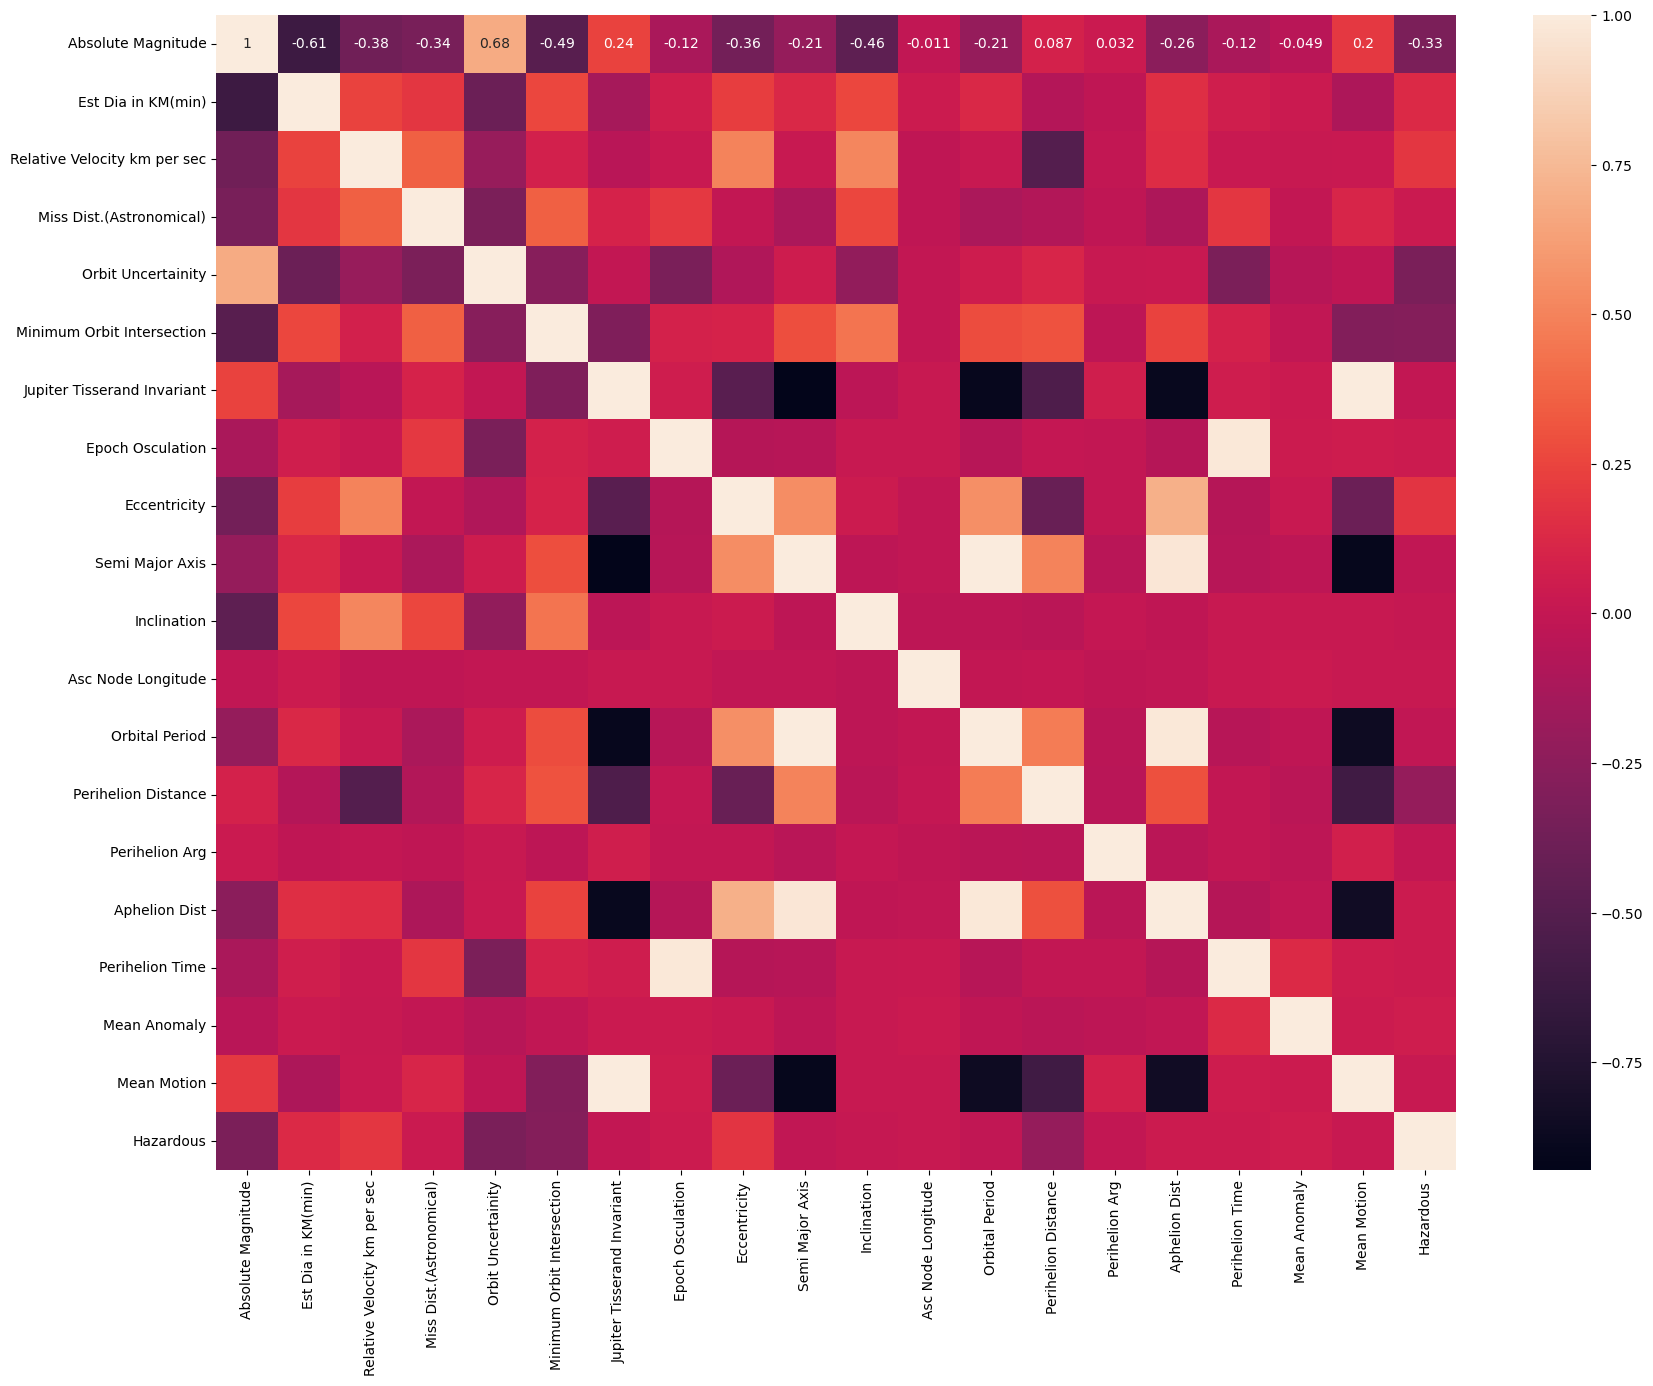

In [102]:
plt.figure(figsize = (20,15))
sns.heatmap(X.corr(), annot = True)

In [96]:
X.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1, inplace=True)

<Axes: >

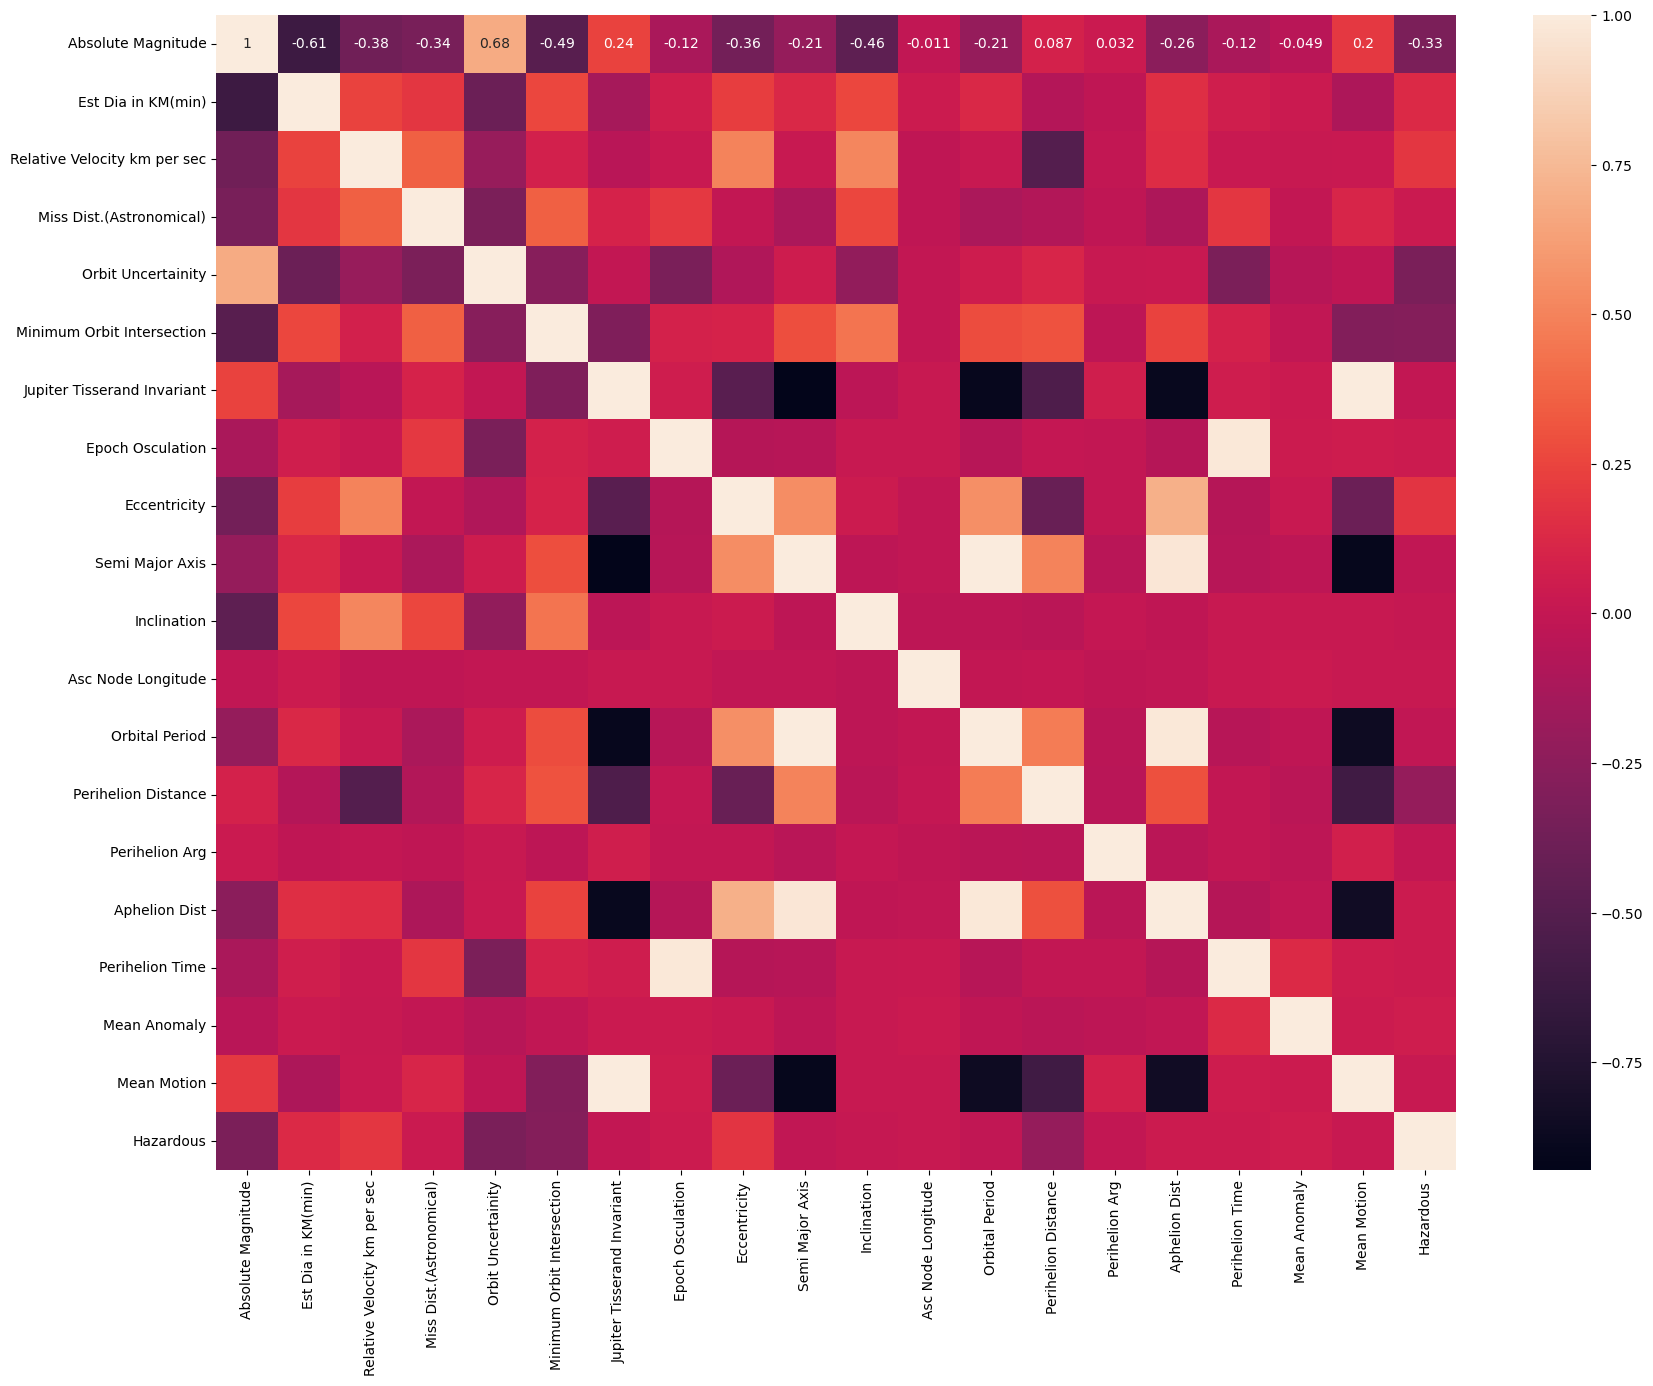

In [104]:
plt.figure(figsize = (20,15))
sns.heatmap(X.corr(), annot = True)

In [110]:
y = X.Hazardous
X.drop(['Hazardous'], axis=1, inplace=True)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0 , test_size = 0.3)

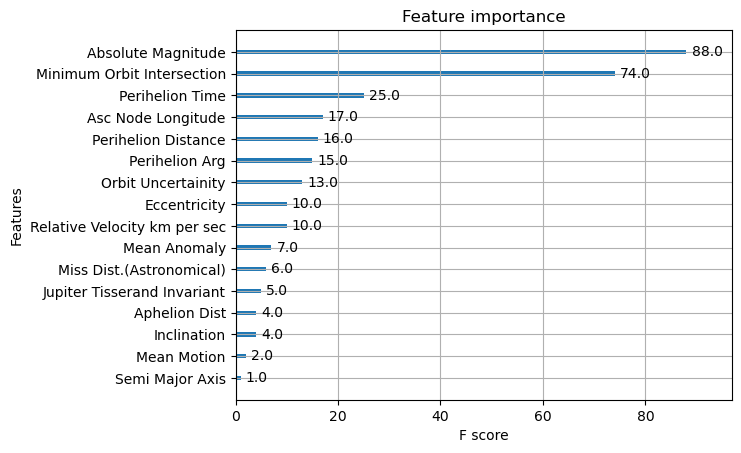

In [116]:
model = XGBClassifier()
model.fit(x_train, y_train)

plot_importance(model)
plt.show()

In [124]:
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(str(accuracy*100) + '%')

99.64463397299218%
